# Fun Predictions
Denna notebok berör några av de dataseten som tillhör samlingen 'Fun'. Målet kommer att vara att se hur väl dessa kan separeras med hjälp av SVM.

#### Importerar bibliotek

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC

#### Allmän funktion för att visa upp klusterna i valfritt dataset

In [61]:
def plot_fun_data(df):
    plt.figure(figsize=(8,6))
    plt.scatter(df['x'], df['y'], c=df['color'])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

#### Klass som paketerar en LinearSVC med tillhörande variabler och funktioner

In [63]:
class PredictModel:
    def __init__(self, df: pd.DataFrame, target_col: str, svc: LinearSVC|SVC, random_state: int = 309, C: bool = 1) -> None:
        self.df = df
        if svc == LinearSVC:
            self.X = self.df.drop(target_col, axis = 1)
        elif svc == SVC:
            scaler = StandardScaler()
            self.X = scaler.fit_transform(self.df.drop(target_col, axis = 1))
        self.y = self.df[target_col]
        
        self.svc = svc(random_state = random_state, C = C)
        self.svc.fit(self.X, self.y)
        
    def plot(self):
        if type(self.svc) == LinearSVC:
            w = self.svc.coef_[0]
            a = -w[0] / w[1]
            xx = np.linspace(0.4 , 2)
            yy = a * xx - (self.svc.intercept_[0]) / w[1]
            plt.plot(xx, yy)
            plt.scatter(self.df['x'], self.df['y'], c=self.y)
        elif type(self.svc) == SVC:
            xx1, xx2 = np.meshgrid(np.arange(-3, 3, 0.02), np.arange(-3, 3, 0.02))
            Z = self.svc.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
            Z = Z.reshape(xx1.shape)
            plt.contourf(xx1, xx2, Z, alpha=0.1)
            for cl in np.unique(self.y):
                plt.scatter(x=self.X[self.y == cl, 0], y=self.X[self.y == cl, 1])
        plt.show()

## Dataset: basic1.csv

#### Importerar och plottar data

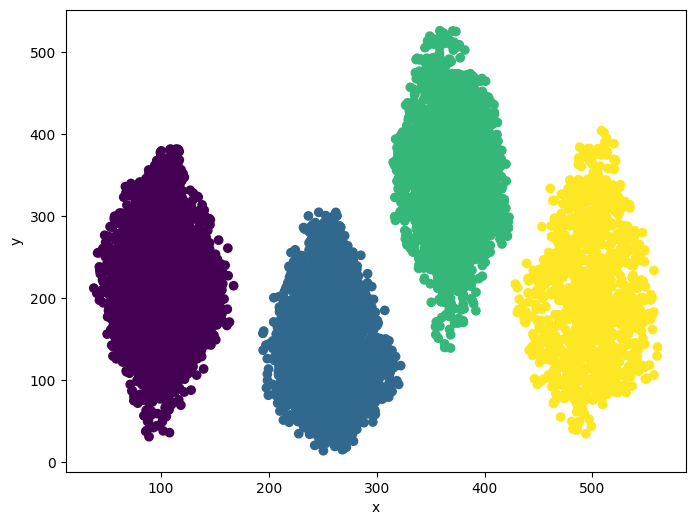

In [64]:
basic1_data = pd.read_csv('basic1.csv')
plot_fun_data(basic1_data)

In [65]:
basic1_data.head()

,x,y,color
0,79.408289,152.834424,0
1,98.046263,186.910700,0
2,240.578979,48.473684,1
3,109.687183,277.945769,0
4,249.626082,229.753352,1


#### Lastar in datan i modellen

In [66]:
basic1_model = PredictModel(basic1_data, 'color', SVC, random_state = 309)

#### Delar upp och ritar ut kluster

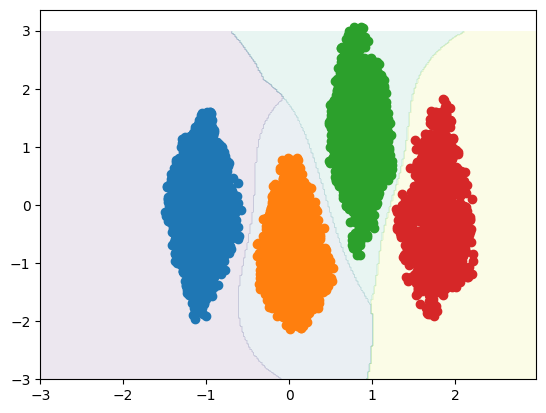

In [67]:
basic1_model.plot()